## CP5 - Modelos de Classificação

- KeveN Ike                 - RM 
- Lucas Alcântara Carvalho  - RM 95111
- Renan Bezerra da Silva    - RM 553228

## Instalação e impotação das bibliotecas

In [ ]:
!pip install seaborn matplotlib numpy pandas

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as ny

## Leitura do arquivo CSV

In [91]:
#leitura do arquivo 
df = pd.read_csv("cogumelos_MODIFICADO.csv")



## Remoção da coluna inutil

In [12]:
#realizar a remoção da coluna inutil

df = df.drop('coluna completamente inutil (me remova)', axis=1)


## Remoção de dados faltantes

In [26]:
#realiza remoção de dados faltantes
df_sem_nulos_coluna = df.dropna()

In [119]:
#df_sem_nulos_coluna = df_sem_nulos_coluna.drop('coluna de origem duvidosa (use por sua conta em risco)', axis=1)

df_sem_nulos_coluna

KeyError: "['coluna de origem duvidosa (use por sua conta em risco)'] not found in axis"

## Instalação da biblioteca SKLEARN

In [32]:
!pip install scikit-learn


     ---------------------------------------- 10.6/10.6 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 301.2/301.2 kB 6.2 MB/s eta 0:00:00


In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [96]:
X = df_sem_nulos_coluna.drop('comestivel', axis=1)
y = df_sem_nulos_coluna["comestivel"]

In [97]:
maquina = DecisionTreeClassifier()


In [98]:

maquina.fit(X, y) # metodo que ajusta e que ele aprende

DecisionTreeClassifier()

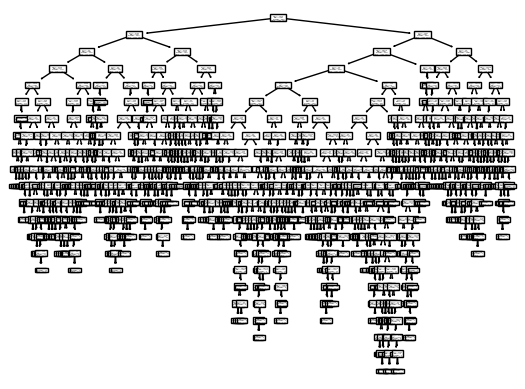

In [99]:
plot_tree(maquina);

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
pac_aleatorio = X.sample(3,random_state=42) # semente o random_state
pac_aleatorio

,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule,estação
25279,1091.0,2.0,6.0,5.0,0.207333,1803.0,14.0,0.943195
26577,674.0,6.0,1.0,10.0,1.504906,947.0,2.0,0.943195
36081,803.0,7.0,6.0,9.0,1.646876,1932.0,3.0,0.943195


In [102]:
maquina.predict(pac_aleatorio)

array([0., 1., 1.])

In [103]:
maquina.predict_proba(pac_aleatorio) # da a probabilidade de certeza 

array([[1., 0.],
       [0., 1.],
       [0., 1.]])

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.20, random_state=42)

In [105]:
accuracy_score(y_train, maquina.predict(X_train))

1.0

In [106]:
maquina_2 = DecisionTreeClassifier()
maquina_2.fit(X_train, y_train)
maquina_2

DecisionTreeClassifier()

In [107]:
print(accuracy_score(y_train, maquina_2.predict(X_train)))
print(accuracy_score(y_test, maquina_2.predict(X_test)))

1.0
0.9123303167420814


In [109]:
from sklearn.ensemble import RandomForestClassifier

floresta = RandomForestClassifier().fit(X_train, y_train)  

In [110]:
y_pred = floresta.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)*100

96.43665158371041

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
#MLP -- treina 

maquina_3 = GradientBoostingClassifier()
maquina_3.fit(X_train, y_train)
maquina_3

GradientBoostingClassifier()

In [116]:
print(accuracy_score(y_train, maquina_3.predict(X_train)))
print(accuracy_score(y_test, maquina_3.predict(X_test)))

0.8503324374027443
0.831447963800905


In [117]:
from sklearn.neural_network import MLPClassifier

maquina_4 =  MLPClassifier()
maquina_4.fit(X_train, y_train)
maquina_4

MLPClassifier()

In [118]:
print(accuracy_score(y_train, maquina_4.predict(X_train)))
print(accuracy_score(y_test, maquina_4.predict(X_test)))

0.5801386334700807
0.5921945701357466
